In [2]:
import xarray as xr
import numpy as np
#import math
from math import atan2, pi
import datetime
def data_ones(x):
    x_new=x/x
    x_new=x_new.fillna(0)
    return x_new
dir_data = 'F:/data/sat_data/oscar/L4/oscar_third_deg/'

In [3]:
#make oscar monthly data, change latitue and longitude to lat and lon, group by month
#dir_data = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg/'
for lyr in range(1993,2019): #2017):
    filename = dir_data + 'oscar_vel' + str(lyr).zfill(4) + '.nc'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
#    ds['spd']=(ds.u**2+ds.v**2)**.5
#    ds['dir']=np.arctan2(ds.v,ds.u)* 180./pi
    ds_month = ds.resample(time='M').mean(keep_attrs=True)    
    ds_month = ds_month.rename({'longitude':'lon','latitude':'lat'})
    ds.close()
    ds_month = ds_month.sel(depth=15).drop('year').drop('depth')
    ds_month.to_netcdf(dir_data + str(lyr) + 'monthly_data_oscar.nc')
#check that yes, resampling is averaging for center of month
#ds_month.u[0,0,450,900].data
#ds.u[0:7,0,450,900].mean()

C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarr

In [4]:
ds_month

<xarray.Dataset>
Dimensions:  (lat: 481, lon: 1201, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2018-12-31
  * lat      (lat) float64 80.0 79.67 79.33 79.0 ... -79.0 -79.33 -79.67 -80.0
  * lon      (lon) float64 20.0 20.33 20.67 21.0 ... 419.0 419.3 419.7 420.0
Data variables:
    u        (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    v        (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jan.01,2018 to Dec.26,2018
    year:           2018
    description:    OSCAR Third Degree Sea Surface Velocity
    CREATION_DATE:  03:39 30-Jan-2019
    version:        2009.0
    source:         Gary Lagerloef, ESR (lager@esr.org) and Kathleen Dohan, E...
    contact:        Kathleen Dohan (kdohan@esr.org) or John T. Gunn (gunn@esr...
 

In [5]:
#make monthly climatology, need to drop 'year' coordinate value for mean to work right
for lyr in range(1993,2019):
    filename = dir_data + str(lyr) + 'monthly_data_oscar.nc'
    ds=xr.open_dataset(filename)
#    ds2 = ds.drop('year').sel(depth=15.0)  #drop year index and depth index
    ds2 = ds #.sel(depth=15.0)  #drop year index and depth index
    if lyr==1993:
        ds_clim = ds2
    else:
        ds_clim = xr.concat([ds_clim,ds2],dim = 'time')
    ds.close()
ds_clim2 = ds_clim.groupby('time.month').mean('time',keep_attrs=True)
ds_clim2.attrs['PERIOD']='Jun 01, 1993 to Dec 26 2018'
ds_clim2.to_netcdf(dir_data + 'climatology_1993_2018_monthly_data_oscar.nc')


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [3]:
#make monthly climatology, need to drop 'year' coordinate value for mean to work right
for lyr in range(2000,2019):
    filename = dir_data + '/monthly/' + str(lyr) + 'monthly_data_oscar.nc'
    ds=xr.open_dataset(filename)
#    ds2 = ds.drop('year').sel(depth=15.0)  #drop year index and depth index
    ds2 = ds #.sel(depth=15.0)  #drop year index and depth index
    if lyr==2000:
        ds_clim = ds2
    else:
        ds_clim = xr.concat([ds_clim,ds2],dim = 'time')
    ds.close()
ds_clim2 = ds_clim.groupby('time.month').mean('time',keep_attrs=True,skipna=False)
ds_clim2.attrs['PERIOD']='Jun 01, 2000 to Dec 26 2018'
ds_clim2.to_netcdf(dir_data + 'climatology/climatology_2000_2018_monthly_data_oscar.nc')


In [55]:
ds_clim2

<xarray.Dataset>
Dimensions:  (lat: 481, lon: 1201, month: 12)
Coordinates:
  * lat      (lat) float64 80.0 79.67 79.33 79.0 ... -79.0 -79.33 -79.67 -80.0
  * lon      (lon) float64 20.0 20.33 20.67 21.0 ... 419.0 419.3 419.7 420.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    u        (month, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    v        (month, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jun 01, 2000 to Dec 26 2018
    year:           2000
    description:    OSCAR Third Degree Sea Surface Velocity
    CREATION_DATE:  16:03 04-Apr-2017
    version:        2017.0
    source:         Kathleen Dohan, ESR (kdohan@esr.org)
    contact:        Kathleen Dohan (kdohan@esr.org)
    company:        Earth & Space Research, Seattle, WA
    referenc

In [7]:
print(dir_data)
ds_clim2=xr.open_dataset(dir_data + '/climatology/climatology_2000_2018_monthly_data_oscar.nc')


F:/data/sat_data/oscar/L4/oscar_third_deg/


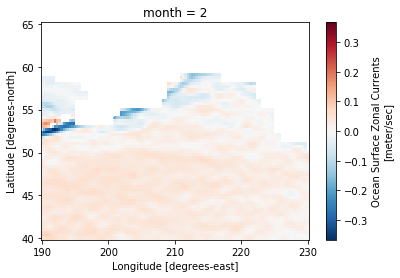

In [5]:
subset = ds_clim2.sel(lat=slice(65,40),lon=slice(190,230))
#print(subset)
subset.u[1,:,:].plot()